Введите чемпионат страны: Премьера Дивизион - Перу
Введите дату начала игры: 16.08.2023
Введите время начала игры: 02:00
Введите название первой команды: Melgar
Введите название второй команды: UTC Cajamarca
Атакующая позиция первой команды:
1. Владение мячом: 62.5
2. Атаки: 112.4
3. Опасные атаки: 63.7
4. Удары по воротам: 15.75
5. Удары в створ: 5
6. Голы: 1.85
Оборонительная позиция первой команды:
1. Владение мячом: 37.5
2. Атаки: 79.1
3. Опасные атаки: 31.25
4. Удары по воротам: 8.1
5. Удары в створ: 3
6. Голы: 0.8
Атакующая позиция второй команды:
1. Владение мячом: 40.6
2. Атаки: 85
3. Опасные атаки: 48.3
4. Удары по воротам: 10.75
5. Удары в створ: 4
6. Голы: 1
Оборонительная позиция второй команды:
1. Владение мячом: 59.4
2. Атаки: 102.3
3. Опасные атаки: 57.05
4. Удары по воротам: 14.2
5. Удары в створ: 6
6. Голы: 1.75


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Прогноз:
Melgar - Ожидаемые голы: 1.85
UTC Cajamarca - Ожидаемые голы: 1.04


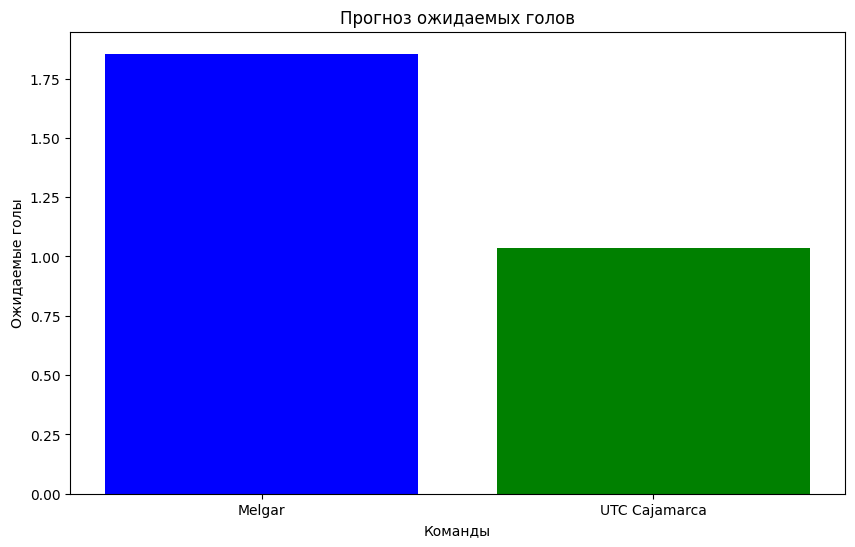


Среднеквадратическая ошибка: 0.00
Среднеквадратичная ошибка: 0.03
Средняя абсолютная ошибка: 0.02
R-квадрат: 1.00

Точность модели: 99.62%


In [4]:
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Функция сбора входных данных для позиции
def input_position(title):
    print(title)
    booth_ownership = float(input("1. Владение мячом: "))
    attacks = float(input("2. Атаки: "))
    dangerous_attacks = float(input("3. Опасные атаки: "))
    shots_on_goal = float(input("4. Удары по воротам: "))
    shots_on_target = float(input("5. Удары в створ: "))
    goals = float(input("6. Голы: "))
    return [booth_ownership, attacks, dangerous_attacks, shots_on_goal, shots_on_target, goals]

def main():
    # Сбор входных данных
    country_championship = input("Введите чемпионат страны: ")
    start_date = input("Введите дату начала игры: ")
    start_time = input("Введите время начала игры: ")
    team1_name = input("Введите название первой команды: ")
    team2_name = input("Введите название второй команды: ")

    # Сбор входных данных для атакующих и оборонительных позиций
    team1_attack_position = input_position("Атакующая позиция первой команды:")
    team1_defense_position = input_position("Оборонительная позиция первой команды:")
    team2_attack_position = input_position("Атакующая позиция второй команды:")
    team2_defense_position = input_position("Оборонительная позиция второй команды:")

    # Объедините данные для печати таблицы
    table_data = [
        (team1_attack_position, team1_defense_position),
        (team2_attack_position, team2_defense_position)
    ]

    # Нейронная сеть и прогностический код
    X = np.array([team1_attack_position + team1_defense_position,
                  team2_attack_position + team2_defense_position])
    y = np.array([[team1_attack_position[-1]],
                  [team2_attack_position[-1]]])

    model = MLPRegressor(
        hidden_layer_sizes=(50, 50),
        activation='relu',
        solver='adam',
        alpha=0.001,
        learning_rate='adaptive',
        max_iter=10000
    )
    model.fit(X, y)
    y_pred = model.predict(X)

    print("\nПрогноз:")
    print(f"{team1_name} - Ожидаемые голы: {y_pred[0]:.2f}")
    print(f"{team2_name} - Ожидаемые голы: {y_pred[1]:.2f}")

    # Создайте гистограмму
    teams = [team1_name, team2_name]
    predicted_goals = [y_pred[0], y_pred[1]]

    plt.figure(figsize=(10, 6))
    plt.bar(teams, predicted_goals, color=['blue', 'green'])
    plt.xlabel('Команды')
    plt.ylabel('Ожидаемые голы')
    plt.title('Прогноз ожидаемых голов')
    plt.show()

    mse = mean_squared_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"\nСреднеквадратическая ошибка: {mse:.2f}")
    print(f"Среднеквадратичная ошибка: {rmse:.2f}")
    print(f"Средняя абсолютная ошибка: {mae:.2f}")
    print(f"R-квадрат: {r2:.2f}")

    accuracy_percentage = model.score(X, y) * 100
    print(f"\nТочность модели: {accuracy_percentage:.2f}%")

if __name__ == "__main__":
    main()
